In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/Users/sofiepalmuskronborg/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## visuals + stats of top labels

In [ ]:
data = pd.read_csv("csv files/labeled_ads.csv", index_col=0)

# sort away duplicate ad texts coming from the same politician -> 58.574
data_un = data.drop_duplicates(subset=["ad_creative_body", "page_id"])

In [63]:
#data = data.drop(["spend", "impressions"], axis=1)
first_column = data.pop('id') 
data.insert(0, "id", first_column)

## Unique + non-unique ads stats

In [8]:
###### For unique ads
top_labels_un = (data_un["top_label"].value_counts()).iloc[:18]  # all labels

# calcu the amount + % for each top
top_percentages_un = (
    data_un["top_label"].value_counts(normalize=True).iloc[:18]
) * 100

# Print the counts and percentages in a readable format
print("Stats on top labels for UNIQUE ADS :\n")
for label, count, percentage in zip(
    top_labels_un.index, top_labels_un.values, top_percentages_un.values
):
    print(f"{label}: {count} ads ({percentage:.2f}%)")


###### For non-unique ads
top_labels = (data["top_label"].value_counts()).iloc[:18]  # all labels

# calcu the amount + % for each top
top_percentages = (data["top_label"].value_counts(normalize=True).iloc[:18]) * 100

# Print the counts and percentages in a readable format
print("\nStats on top labels for DUPLICATE ads:\n")
for label, count, percentage in zip(
    top_labels.index, top_labels.values, top_percentages.values
):
    print(f"{label}: {count} ads ({percentage:.2f}%)")

Stats on top labels for UNIQUE ADS :

Call for Action: 38299 ads (65.39%)
Healthcare: 3331 ads (5.69%)
Law and Crime: 3251 ads (5.55%)
Economy: 2587 ads (4.42%)
Other: 1861 ads (3.18%)
Defense: 1578 ads (2.69%)
Immigration: 1553 ads (2.65%)
Education and Culture: 1543 ads (2.63%)
Climate: 1114 ads (1.90%)
Foreign Affair: 1029 ads (1.76%)
Labor and Employment: 828 ads (1.41%)
Agriculture: 509 ads (0.87%)
Civil Rights: 457 ads (0.78%)
Transport: 271 ads (0.46%)
Social Welfare: 189 ads (0.32%)
Housing: 174 ads (0.30%)

Stats on top labels for DUPLICATE ads:

Call for Action: 353488 ads (76.89%)
Healthcare: 20754 ads (4.51%)
Law and Crime: 17701 ads (3.85%)
Economy: 10691 ads (2.33%)
Climate: 10426 ads (2.27%)
Immigration: 9408 ads (2.05%)
Defense: 8676 ads (1.89%)
Other: 6747 ads (1.47%)
Education and Culture: 5048 ads (1.10%)
Labor and Employment: 4585 ads (1.00%)
Foreign Affair: 4035 ads (0.88%)
Civil Rights: 3213 ads (0.70%)
Agriculture: 1555 ads (0.34%)
Housing: 1192 ads (0.26%)
Trans

In [9]:
###### Top 10 advertiser in the dataset - non-unique ads

top_10_count = (
    data.groupby("page_id")
    .size()  # row count pr pageid
    .reset_index(name="ad_count") 
    .merge(
        data[["page_id", "page_name", "party"]], on="page_id", how="left"
    )  # merge back with original to get names for top 1+
    .drop_duplicates() 
    .sort_values(by="ad_count", ascending=False)  # Sort by ad_count
)

print(top_10_count.head(10))

                 page_id  ad_count                 page_name       party
164882   124955570892789     57326            Bernie Sanders    Democrat
373598  1316372698453411     55604  Alexandria Ocasio-Cortez    Democrat
63944        38471053686     36480          Elizabeth Warren    Democrat
236560   163148530407080     16046        Captain Mark Kelly    Democrat
48499        36872302227     15445               Cory Booker    Democrat
12379         6820348410     12106        Kirsten Gillibrand    Democrat
120774       97493741436      9096      John W. Hickenlooper    Democrat
106062       57495285387      7038            Michael Bennet    Democrat
319382   428821014132730      7001              Katie Porter    Democrat
253190   165987503528599      6721            Lindsey Graham  Republican


## visuals of top labels for non-unique ads 

/var/folders/cr/2b4bjd0d6cscnr8h_66vmrqm0000gn/T/ipykernel_27664/3119488933.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=party_counts.index, y=party_counts.values, palette=col)
/Users/sofiepalmuskronborg/anaconda3/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/sofiepalmuskronborg/anaconda3/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key

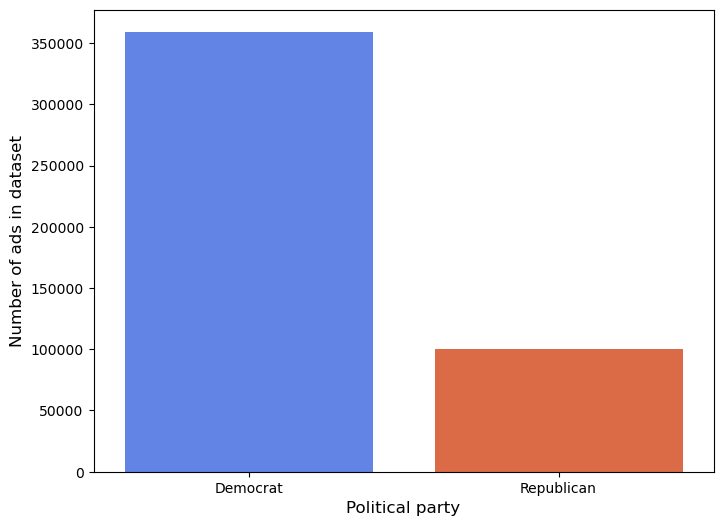

In [6]:
# Filter data rows based on party to work with stats on the individual parties
label_data_D = data[data["party"] == "Democrat"]
label_data_R = data[data["party"] == "Republican"]

# get an value of the count of rows for both parties/politicians
party_counts = data["party"].value_counts()

col = ["#4c79fa", "#f45e2e"]  # bar plot
sns.set_palette(col)

plt.figure(figsize=(8, 6))
sns.barplot(x=party_counts.index, y=party_counts.values, palette=col)
#plt.title("Distribution of ads between the two parties ", fontsize=14)
plt.xlabel("Political party", fontsize=12)
plt.ylabel("Number of ads in dataset", fontsize=12)
plt.show()

## democrats (unique + non-unique)

Text(0, 0.5, 'Top labels')

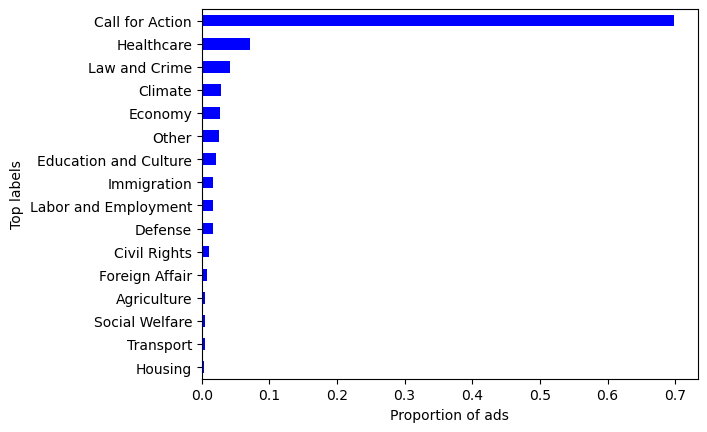

In [4]:
###### plot based on unique ads
# Filter data rows based on party to work with stats on the individual parties
label_D_un = data_un[data_un["party"] == "Democrat"]
label_R_un = data_un[data_un["party"] == "Republican"]

top_labels_D_un = (label_D_un["top_label"].value_counts(normalize=True)).iloc[:16]  # all labels
top_labels_D_un = top_labels_D_un.sort_values(ascending=True)
top_labels_D_un.plot(kind="barh", color="blue")
# plt.title("Most popular labels for Democrats (unqiue ads)", fontsize=16)
plt.xlabel("Proportion of ads")
plt.ylabel("Top labels")

In [13]:
# calcu the amount + % for each top

###### non-unique ads

label_D = data[data["party"] == "Democrat"]
top_labels_D = (label_D["top_label"].value_counts()).iloc[:16]  # all labels

top_D_percentages = (
    label_D["top_label"].value_counts(normalize=True).iloc[:16]
) * 100

print("Stats for 'Democratic ads' and top labels for all ADS:\n")
for label, count, percentage in zip(
    top_labels_D.index, top_labels_D.values, top_D_percentages.values
):
    print(f"{label}: {count} ads ({percentage:.2f}%)")


###### unique ads
top_labels_D_un = (label_D_un["top_label"].value_counts()).iloc[:16]

top_D_percentages_un = (
    label_D_un["top_label"].value_counts(normalize=True).iloc[:16]
) * 100


print("\nStats for 'Democratic ads' and top labels for UNIQUE ADS:\n")
for label, count, percentage in zip(
    top_labels_D_un.index, top_labels_D_un.values, top_D_percentages_un.values
):
    print(f"{label}: {count} ads ({percentage:.2f}%)")

Stats for 'Democratic ads' and top labels for all ADS:

Call for Action: 283079 ads (78.79%)
Healthcare: 17826 ads (4.96%)
Law and Crime: 12507 ads (3.48%)
Climate: 10115 ads (2.82%)
Economy: 6260 ads (1.74%)
Immigration: 5139 ads (1.43%)
Other: 4540 ads (1.26%)
Defense: 4231 ads (1.18%)
Labor and Employment: 4079 ads (1.14%)
Education and Culture: 3304 ads (0.92%)
Civil Rights: 2980 ads (0.83%)
Foreign Affair: 1646 ads (0.46%)
Housing: 1062 ads (0.30%)
Social Welfare: 971 ads (0.27%)
Transport: 831 ads (0.23%)
Agriculture: 734 ads (0.20%)

Stats for 'Democratic ads' and top labels for UNIQUE ADS:

Call for Action: 24853 ads (69.84%)
Healthcare: 2516 ads (7.07%)
Law and Crime: 1503 ads (4.22%)
Climate: 988 ads (2.78%)
Economy: 966 ads (2.71%)
Other: 890 ads (2.50%)
Education and Culture: 771 ads (2.17%)
Immigration: 613 ads (1.72%)
Labor and Employment: 608 ads (1.71%)
Defense: 603 ads (1.69%)
Civil Rights: 384 ads (1.08%)
Foreign Affair: 285 ads (0.80%)
Agriculture: 167 ads (0.47%)
So

## republicans

Text(0.5, 0, 'Proportion of ads')

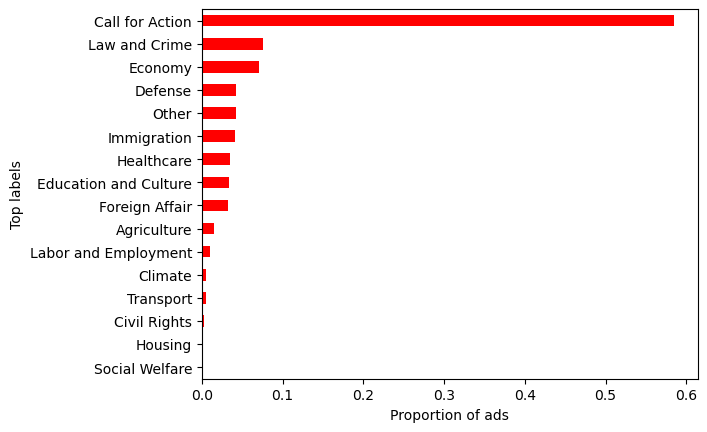

In [6]:
###### plot based on unique ads
top_labels_R_un = (label_R_un["top_label"].value_counts(normalize=True)).iloc[:16]

top_labels_R_un = top_labels_R_un.sort_values(ascending=True)
top_labels_R_un.plot(kind="barh", color="red")
plt.ylabel("Top labels")
plt.xlabel("Proportion of ads")  
# plt.ylabel("Frequency", fontsize=12)

In [22]:
# calcu the amount + % for each top

###### non-unique ads
label_R = data[data["party"] == "Republican"]
top_labels_R = (label_R["top_label"].value_counts()).iloc[:16]  # all labels

top_R_percentages = (
    label_R["top_label"].value_counts(normalize=True).iloc[:16]
) * 100

print("Stats for 'Republican ads' and their top labels for all ADS:\n")
for label, count, percentage in zip(
    top_labels_R.index, top_labels_R.values, top_R_percentages.values
):
    print(f"{label}: {count} ads ({percentage:.2f}%)")

###### unique ads

top_R_percentages_un = (
    label_R_un["top_label"].value_counts(normalize=True).iloc[:16]
) * 100

print("\nStats for 'Republican ads' and their top labels for UNIQUE:\n")
for label, count, percentage in zip(
    top_labels_R_un.index, top_labels_R_un.values, top_R_percentages_un.values
):
    print(f"{label}: {count} ads ({percentage:.2f}%)")

Stats for 'Republican ads' and their top labels for all ADS:

Call for Action: 70409 ads (70.11%)
Law and Crime: 5194 ads (5.17%)
Defense: 4445 ads (4.43%)
Economy: 4431 ads (4.41%)
Immigration: 4269 ads (4.25%)
Healthcare: 2928 ads (2.92%)
Foreign Affair: 2389 ads (2.38%)
Other: 2207 ads (2.20%)
Education and Culture: 1744 ads (1.74%)
Agriculture: 821 ads (0.82%)
Labor and Employment: 506 ads (0.50%)
Climate: 311 ads (0.31%)
Transport: 304 ads (0.30%)
Civil Rights: 233 ads (0.23%)
Housing: 130 ads (0.13%)
Social Welfare: 103 ads (0.10%)

Stats for 'Republican ads' and their top labels for UNIQUE:

Call for Action: 13446 ads (58.49%)
Law and Crime: 1748 ads (7.60%)
Economy: 1621 ads (7.05%)
Defense: 975 ads (4.24%)
Other: 971 ads (4.22%)
Immigration: 940 ads (4.09%)
Healthcare: 815 ads (3.55%)
Education and Culture: 772 ads (3.36%)
Foreign Affair: 744 ads (3.24%)
Agriculture: 342 ads (1.49%)
Labor and Employment: 220 ads (0.96%)
Climate: 126 ads (0.55%)
Transport: 120 ads (0.52%)
Civil

## visuals of the top vektor scores

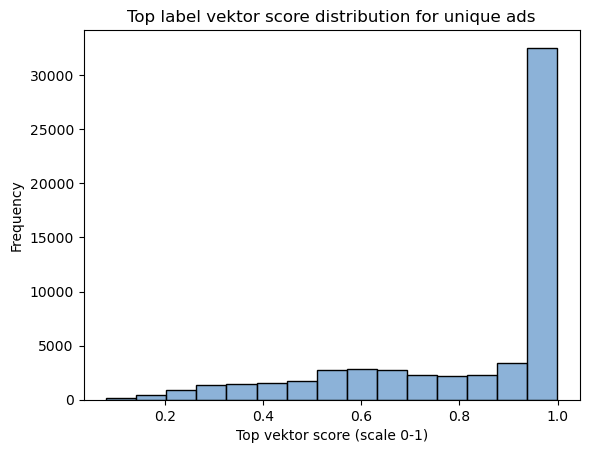

In [3]:
###### unique ads
sns.histplot(data_un["top_score"], bins=15, color=(0.4, 0.6, 0.8))
plt.title('Top label vektor score distribution for unique ads')
plt.xlabel('Top vektor score (scale 0-1)')
plt.ylabel('Frequency')
plt.show()

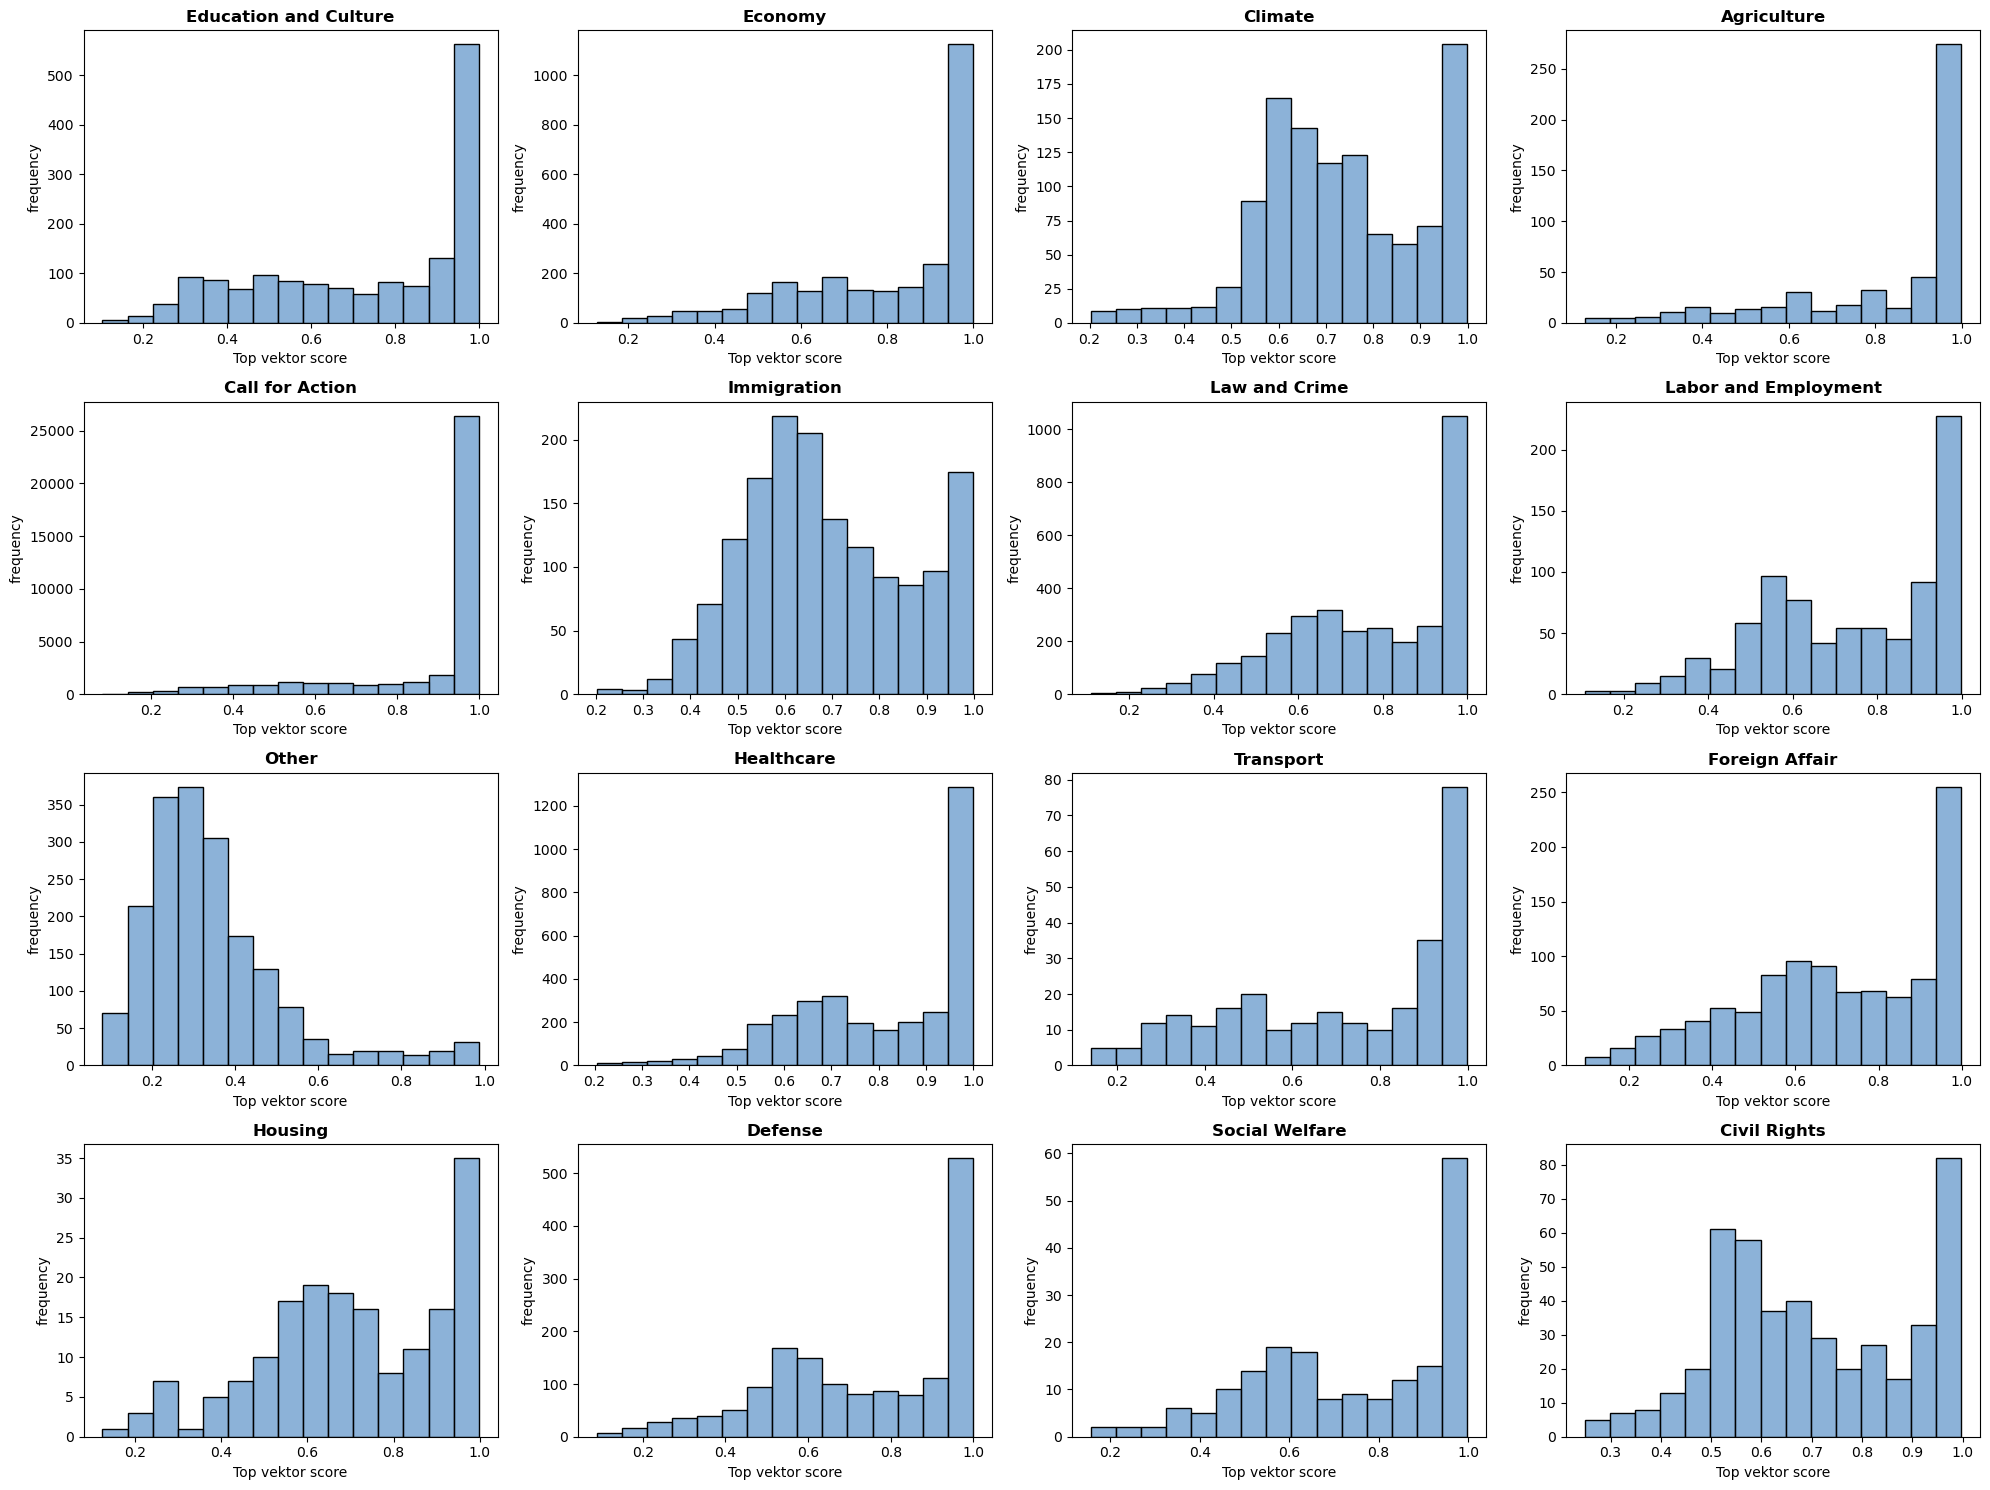

In [33]:
###### unique ads

fig, axs = plt.subplots(
    4, 4, figsize=(20, 15)
)  
#axs = axs.flatten() 

# loop through each unique category and generate subplot
for x, category in enumerate(data_un["top_label"].unique()):
    sns.histplot(
        data=data_un[data_un["top_label"] == category],
        x="top_score",
        ax=axs[x],
        bins=15,
        color=(0.4, 0.6, 0.8),
        fill=True,
    )
    axs[x].set_title(f"{category}", weight="bold")
    axs[x].set_xlabel("Top vektor score")
    axs[x].set_ylabel("frequency")

plt.tight_layout()
plt.show()

## labels per party

In [25]:
label_D = data_un[data_un["party"] == "Democrat"]  # 35.585 entries
label_R = data_un[data_un["party"] == "Republican"] # 22.989 entries

In [9]:
# normalize values for uncor + real entropy for Democrat
democrat, bins = np.histogram(
    label_D["top_score"], bins=np.linspace(0, 3.6, 19)
)
democrat = democrat / sum(democrat)

counts, bins = np.histogram(label_D["top_score"], bins=15)
normalized_counts = counts / counts.sum()

# normalize values for uncor + real entropy for Republican
republican, bins = np.histogram(label_R["top_score"], bins=bins)
republican = republican / sum(republican)

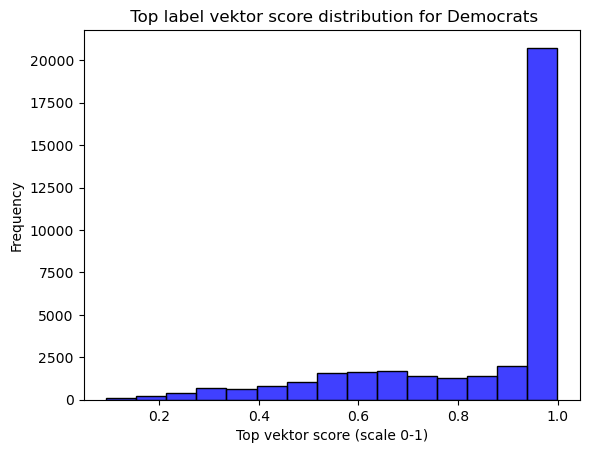

In [12]:
## distribution for republicans
sns.histplot(label_D["top_score"], bins=15, color="blue")
plt.title(" Top label vektor score distribution for Democrats")
plt.xlabel("Top vektor score (scale 0-1)")
plt.ylabel("Frequency")
plt.show()

Text(0, 0.5, 'Probability density')

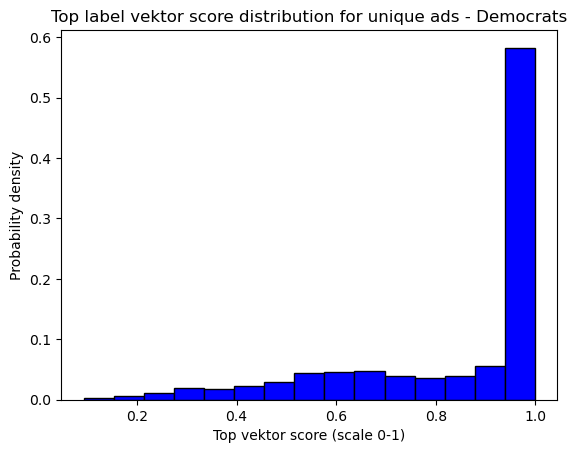

In [22]:
counts, bins = np.histogram(label_D["top_score"], bins=15)
normalized_counts = counts / counts.sum()
plt.bar(
    bins[:-1],
    normalized_counts,
    width=np.diff(bins),
    color="blue",
    align="edge",
    edgecolor="black",
)
plt.title("Top label vektor score distribution for unique ads - Democrats")
plt.xlabel("Top vektor score (scale 0-1)")
plt.ylabel("Probability density")

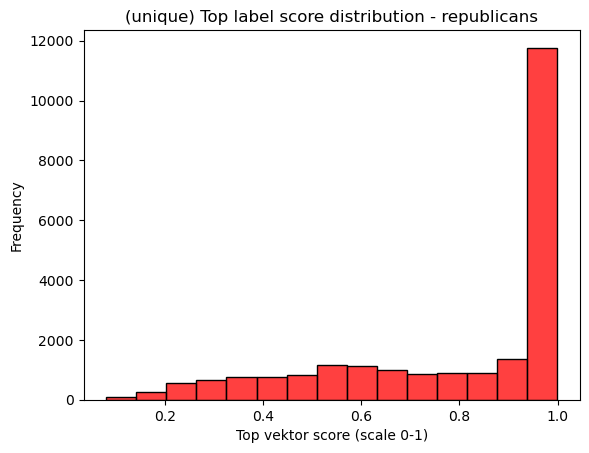

In [8]:
## distribution for republicans
sns.histplot(label_R["top_score"], bins=15, color="red")
plt.title("(unique) Top label score distribution - republicans")
plt.xlabel("Top vektor score (scale 0-1)")
plt.ylabel("Frequency")
plt.show()

(0.0, 0.6)

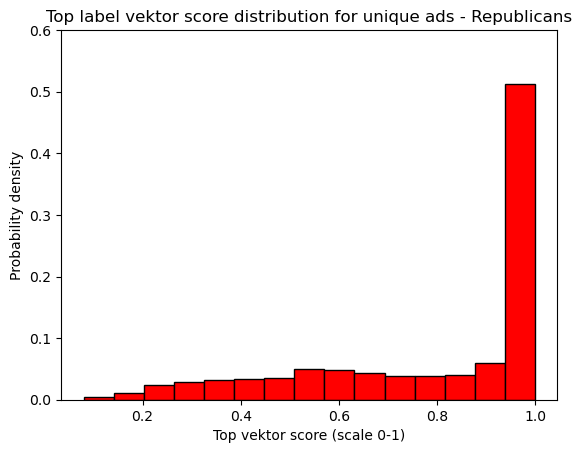

In [21]:
counts, bins = np.histogram(label_R["top_score"], bins=15)
normalized_counts = counts / counts.sum()
plt.bar(
    bins[:-1],
    normalized_counts,
    width=np.diff(bins),
    color="red",
    align="edge",
    edgecolor="black",
)

plt.title("Top label vektor score distribution for unique ads - Republicans")
plt.xlabel("Top vektor score (scale 0-1)")
plt.ylabel("Probability density")
plt.ylim(0, 0.6)

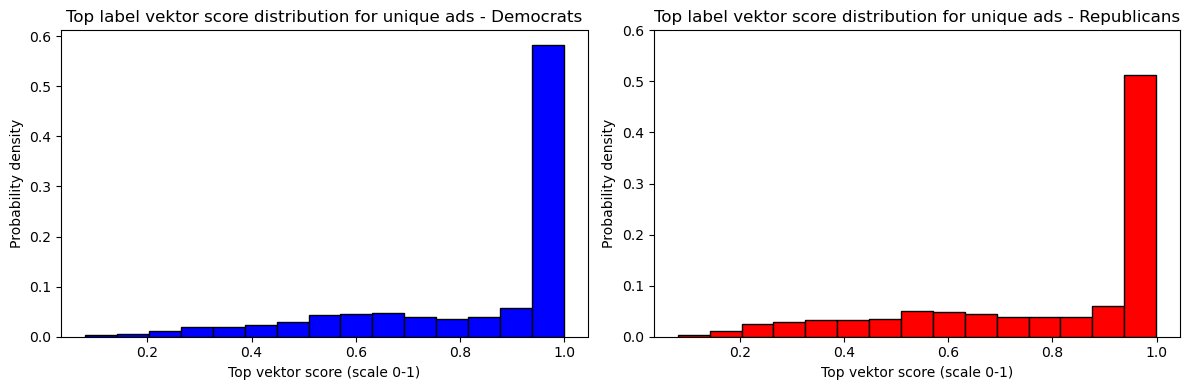

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Democrats plot
axes[0].bar(
    bins[:-1],
    normalized_counts_d,
    width=np.diff(bins),
    color="blue",
    edgecolor="black",
    align="edge",
)
axes[0].set_title("Top label vektor score distribution for unique ads - Democrats")
axes[0].set_ylabel("Probability density")
axes[0].set_xlabel("Top vektor score (scale 0-1)")

# Republicans plot
axes[1].bar(
    bins[:-1],
    normalized_counts_r,
    width=np.diff(bins),
    color="red",
    edgecolor="black",
    align="edge",
)
axes[1].set_title("Top label vektor score distribution for unique ads - Republicans")
axes[1].set_ylabel("Probability density")
axes[1].set_xlabel("Top vektor score (scale 0-1)")
axes[1].set_ylim(0, 0.6)

plt.tight_layout()
plt.show()

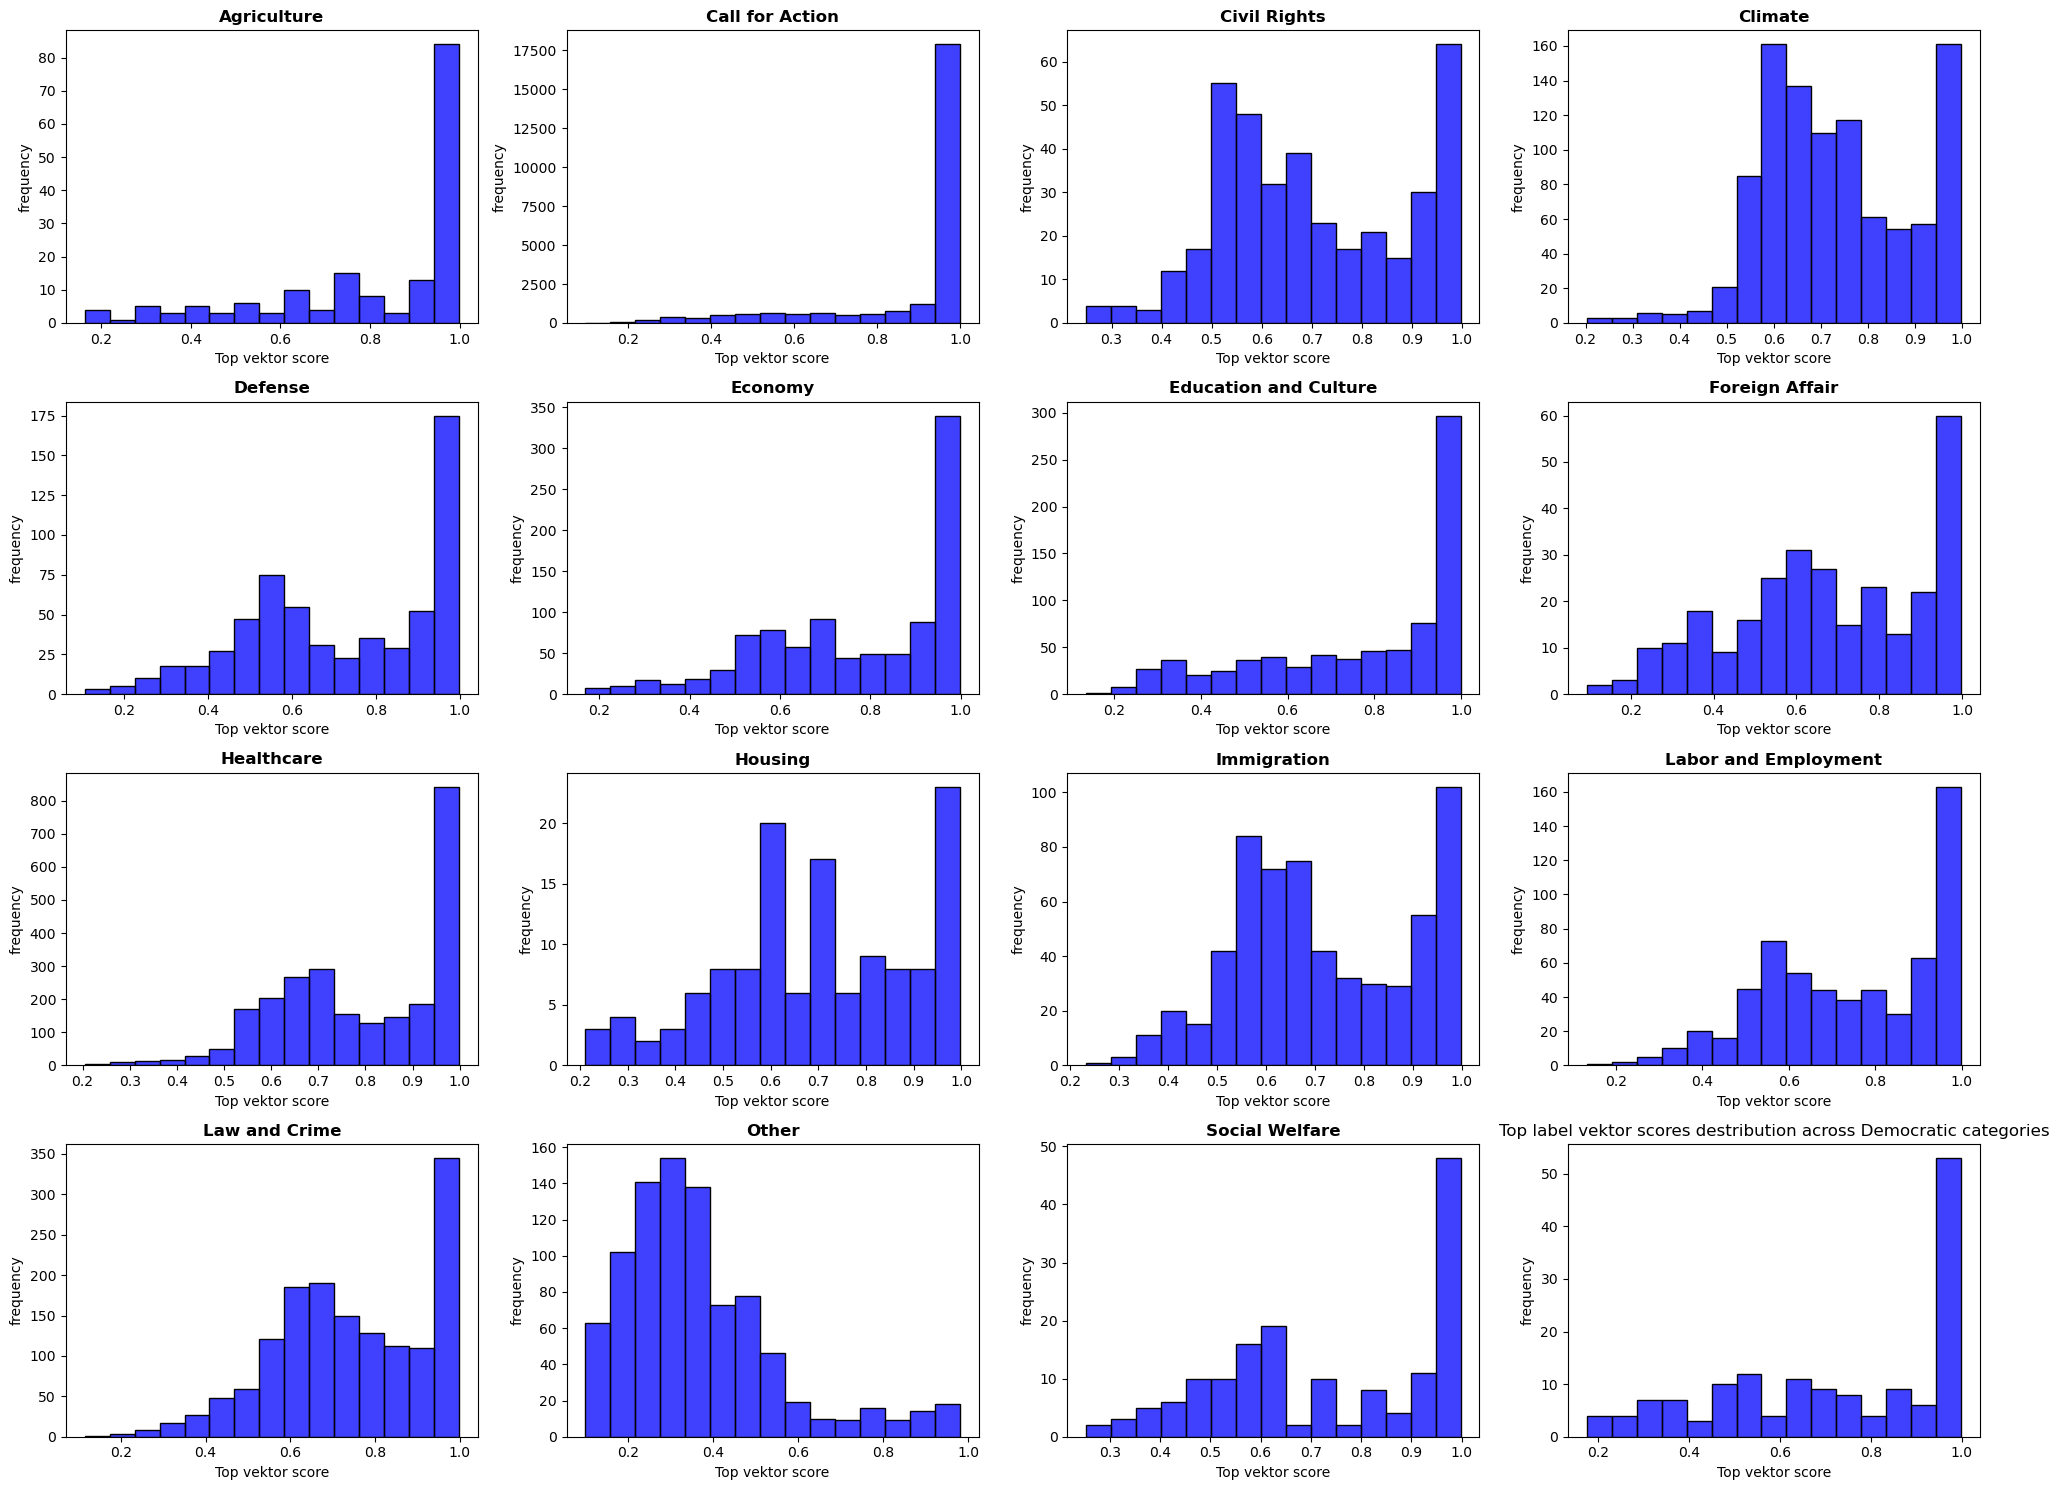

In [28]:
###### Democrats

fig, axs = plt.subplots(4, 4, figsize=(20, 15))
axs = axs.flatten()

sorted_labels = sorted(label_D["top_label"].unique())

for x, category in enumerate(sorted_labels):
    sns.histplot(
        data=label_D[label_D["top_label"] == category],
        x="top_score",
        ax=axs[x],
        bins=15,
        color='blue',
        fill=True,
    )
    axs[x].set_title(f"{category}", weight="bold")
    axs[x].set_xlabel("Top vektor score")
    axs[x].set_ylabel("frequency")
plt.title("Top label vektor scores destribution across Democratic categories")
plt.tight_layout()
plt.show()

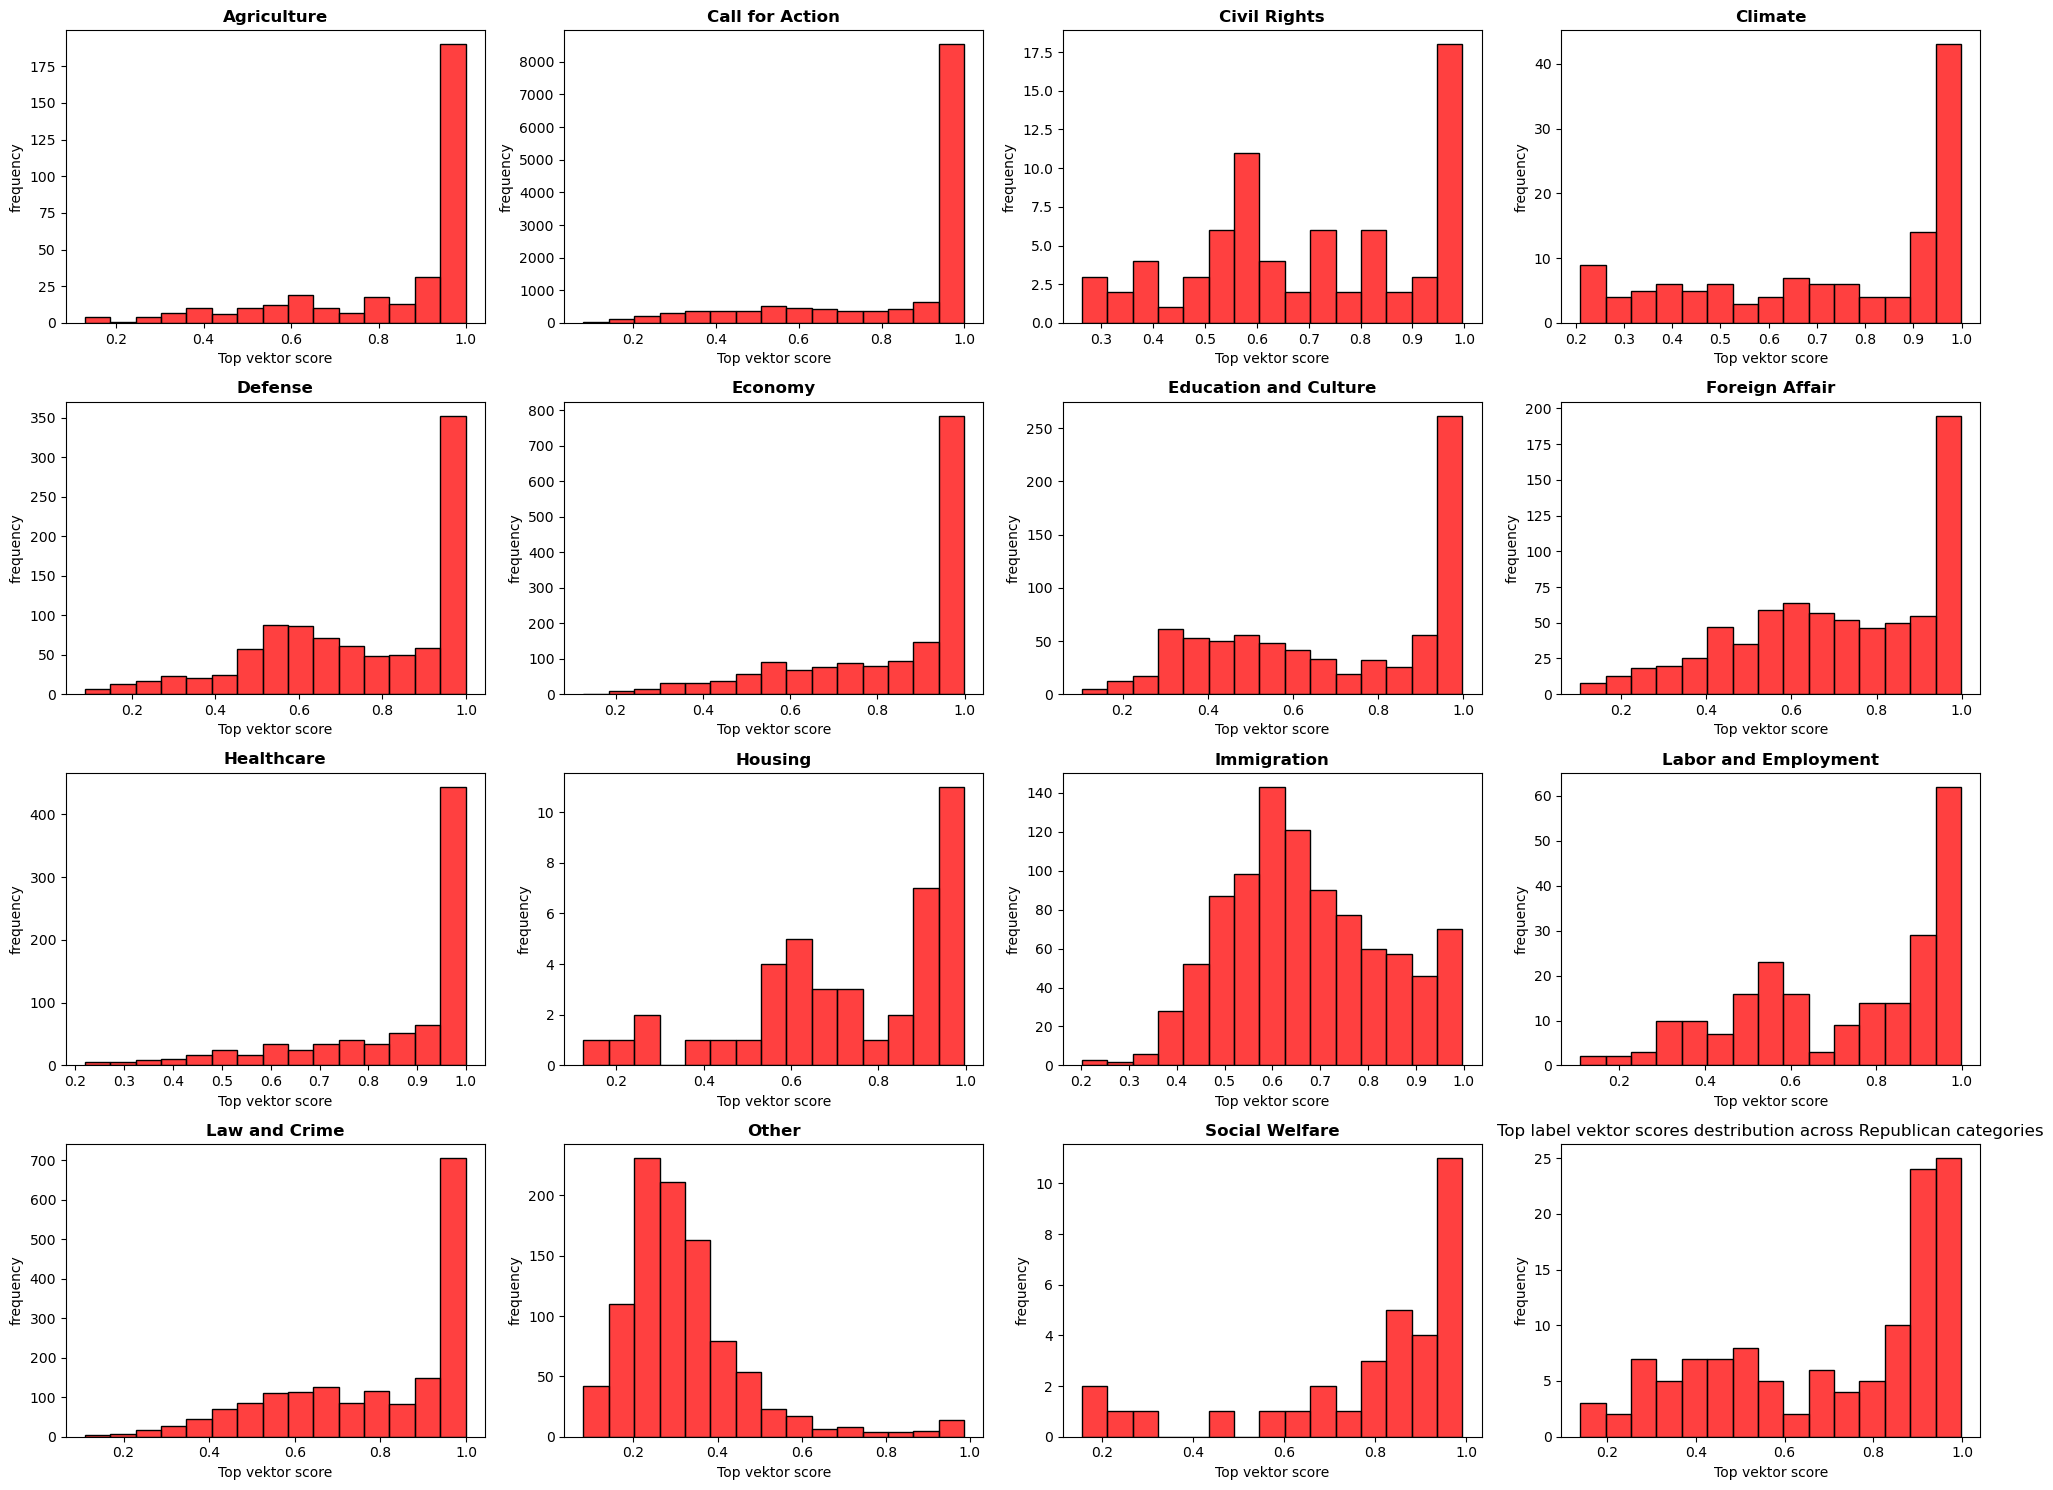

In [29]:
###### Republicans

fig, axs = plt.subplots(4, 4, figsize=(20, 15))
axs = axs.flatten()

sorted_labels = sorted(label_R["top_label"].unique())
for x, category in enumerate(sorted_labels):
    sns.histplot(
        data=label_R[label_R["top_label"] == category],
        x="top_score",
        ax=axs[x],
        bins=15,
        color="red",
        fill=True,
    )
    axs[x].set_title(f"{category}", weight="bold")
    axs[x].set_xlabel("Top vektor score")
    axs[x].set_ylabel("frequency")
plt.title("Top label vektor scores destribution across Republican categories")

plt.tight_layout()
plt.show()

## distribution of tokens above max limit

In [7]:
df_above = pd.read_csv(
    "/Users/sofiepalmuskronborg/Desktop/above_512_finish.csv",
    index_col=0,
)

df_below = pd.read_csv(
    "/Users/sofiepalmuskronborg/Library/CloudStorage/OneDrive-ITU/ITU/Thesis/Data/tokens_lim/under_512.csv",
    index_col=0,
)

Text(0.5, 0, 'Number of tokens')

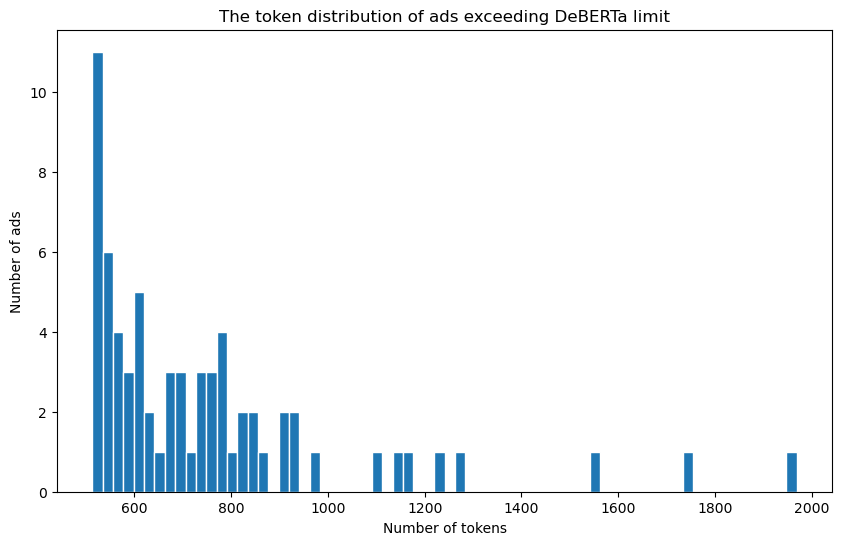

In [8]:
###### unique ads
plt.figure(figsize=(10, 6))

plt.title("The token distribution of ads exceeding DeBERTa limit")
df_above["num_tokens"].plot(kind="hist", bins=68, edgecolor="white")
plt.ylabel("Number of ads")
plt.xlabel("Number of tokens")

Text(0.5, 0, 'Number of tokens')

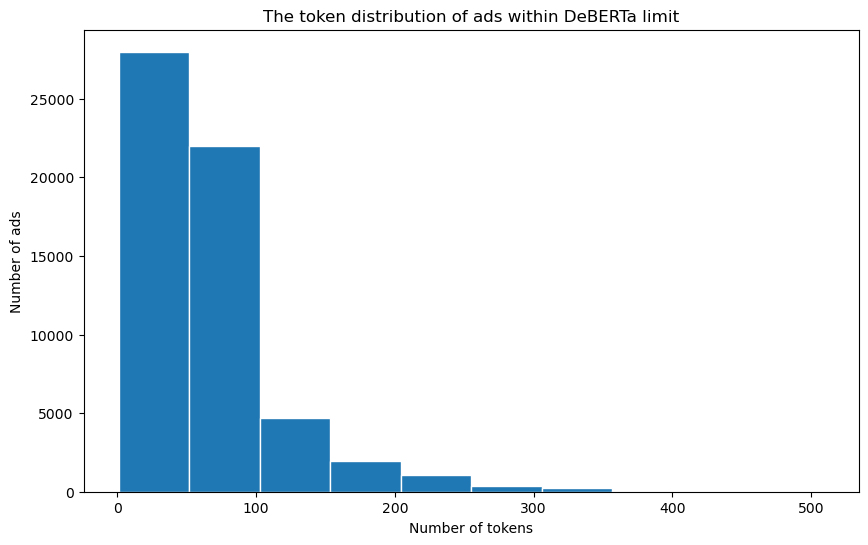

In [12]:
###### unique ads

plt.figure(figsize=(10, 6))

plt.title("The token distribution of ads within DeBERTa limit")
df_below["num_tokens"].plot(kind="hist",edgecolor="white")
plt.ylabel("Number of ads")
plt.xlabel("Number of tokens")

In [17]:
###### stats for some unique ads
count_below_100tk = df_below["num_tokens"] < 100

x_below = (df_below["num_tokens"] < 100).sum()

percentage_x = (x_below / 58449) * 100
print(
    f"Count of ads below/equal to 100 tokens: {x_below} and the percentage {percentage_x:.2f}%"
)